In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('main.csv')

In [3]:
list(data.columns)

['Unnamed: 0',
 'Unnamed: 1',
 'Family',
 'Formal Name',
 'Type',
 'Domain',
 'Context Length',
 '# Parameters',
 '(temp, top_p)',
 'Unnamed: 9',
 'Unnamed: 10',
 'Score',
 'Std',
 '# pblms',
 'Mean Score',
 'Max Score']

/var/folders/_r/wqh6bwsx08sg160mf80dds980000gn/T/ipykernel_2156/3918714720.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/_r/wqh6bwsx08sg160mf80dds980000gn/T/ipykernel_2156/3918714720.py:132: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


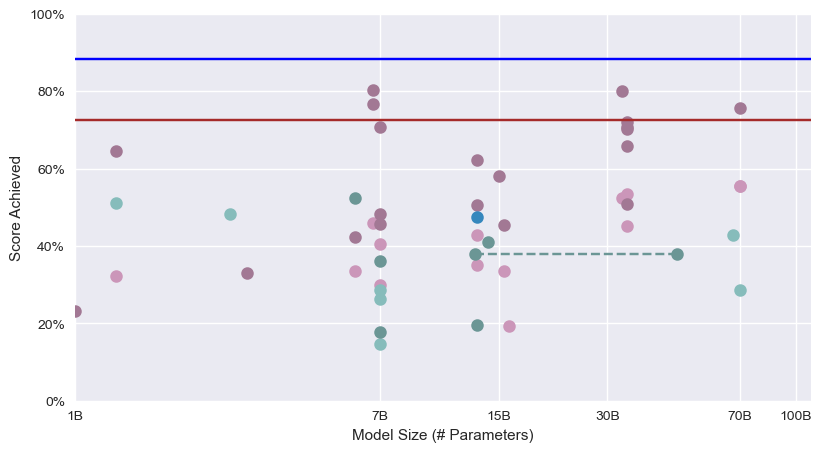

In [22]:
import math
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8, 4.5))

# placement_delta = {
#     'Baichuan2-7B': (0., 0.),
#     'phi-1.5': (0., +0.01),
#     'WizardCoder-1B': (-0.5, -0.02),
#     'WizardCoder-3B': (-3., +0.03),
#     'OctoGeeX': (-1., +0.04),
#     'deepseek-coder-6.7b': (0., +0.02),
#     'Zypher': (0., +0.01),
#     'CodeLlama-34B-Instruct': (-6.25, 0.)
# }
# select = ['phi-1', 'phi-1.5', 'OctoGeeX', 'Baichuan2', 'WizardCoder-Python-34B', 'WizardCoder-Python-13B',
#             'WizardCoder-1B', 'WizardCoder-3B',
#             'deepseek-coder', 'CodeLlama-7B-Instruct', 'CodeLlama-34B',
#             'Codellama-13B-Instruct',
#             'CodeGeeX2', 'Zypher', 'StarCoderPlus', 'OctoCoder']

def my_scatter_plot(ax, data, model_type, model_domain, moe, color, fmt='o'):
    z = []
    x = []
    y = []
    yerr_low = []
    yerr_high = []
    for i, row in data.iterrows():
        if row['# Parameters'].count('?') == 0:
            if model_type is None or row['Type'] == model_type:
                if model_domain is None or row['Domain'] == model_domain:
                    if (moe and row['# Parameters'].count('/') > 0) or (not moe and row['# Parameters'].count('/') == 0):
                        if not moe:
                            x.append(float(row['# Parameters'][:-1]))
                        else:
                            allparam = float(row['# Parameters'].split('/')[0].strip()[:-1])
                            actparam = float(row['# Parameters'].split('/')[1].strip()[:-1])
                            x.append(allparam)
                            x.append(actparam)
                        
                        # mean = float(row['Score'][:-1]) / 100
                        # std = float(row['Std'][:-1]) / 100
                        mean = float(row['Unnamed: 9']) / 100
                        if math.isnan(mean): 
                            del x[-1]
                            if moe:
                                del x[-1]
                            continue
                        
                        repeat = 2 if moe else 1
                        for _ in range(repeat):
                            z.append(f"{row['Formal Name']}\n{mean * 100.:.2f}%")
                            y.append(mean)
                            # yerr_low.append(std)
                            # yerr_high.append(std)

                        if moe:
                            ax.plot([actparam, allparam], [mean, mean], '--', color=color)
                            # ax.fill_between([actparam, allparam], mean-std, mean+std, alpha=0.2, color=color)

    # if not moe:
    # markers, caps, bars = ax.errorbar(x, y, np.array([yerr_low, yerr_high]), fmt=fmt, linewidth=2, capsize=6, markersize=6, color=color)
    ax.scatter(x, y, marker=fmt, linewidths=2, color=color)

    # [bar.set_alpha(0.5) for bar in bars]
    # [cap.set_alpha(0.5) for cap in caps]

fac = 1.5
code_color = (243./255./fac, 180./255./fac, 222./255./fac)
general_color = (161./255./fac, 225./255./fac, 224./255./fac)
# 
# code_color = (200./255./fac, 200./255./fac, 200./255./fac)
# general_color = (200./255./fac, 200./255./fac, 200./255./fac)


fac = 1.2
code_base_color = (243./255./fac, 180./255./fac, 222./255./fac)
general_base_color = (161./255./fac, 225./255./fac, 224./255./fac)
# 
# code_base_color = (200./255./fac, 200./255./fac, 200./255./fac)
# general_base_color = (200./255./fac, 200./255./fac, 200./255./fac)

my_scatter_plot(ax, data, 'Base', 'Code', False, code_base_color)
my_scatter_plot(ax, data, 'Base', 'Code', True, code_base_color)
my_scatter_plot(ax, data, 'Finetuned', 'Code', False, code_color)
my_scatter_plot(ax, data, 'Finetuned', 'Code', True, code_color)

my_scatter_plot(ax, data, 'Base', 'General', False, general_base_color)
my_scatter_plot(ax, data, 'Base', 'General', True, general_base_color)
my_scatter_plot(ax, data, 'Finetuned', 'General', False, general_color)
my_scatter_plot(ax, data, 'Finetuned', 'General', True, general_color)

# to annotate
# for i, txt in enumerate(z):
#     if any([txt.startswith(s) for s in select]):
#     # if True:
#         delta_x, delta_y = 0.0, 0.0
#         for k in placement_delta:
#             if txt.startswith(k):
#                 delta_x, delta_y = placement_delta[k]
#         ax.annotate(txt, (x[i] + 0.5 + delta_x, y[i] - 0.03 + delta_y), color='tab:blue')

num_unk = 0
for i, row in data.iterrows():
    if row['# Parameters'].count('?') > 0 and row['Formal Name'] != 'GPT4-turbo-1106':
        colors = {0: 'blue', 1: 'brown', 2: 'pink', 3: 'blue'}

        mean = float(row['Unnamed: 9']) / 100
        # mean = float(row['Score'][:-1]) / 100
        # std = float(row['Std'][:-1]) / 100

        xx = [0, 1100]
        mean = mean
        # mmin = mean - std
        # mmax = mean + std
        yy = [mean, mean]
        ax.plot(xx,yy,'-', color=colors[num_unk], label=f"{row['Formal Name']}  {mean*100.:.2f}%")
        # ax.fill_between(xx, mmin, mmax, alpha=0.2, color=colors[num_unk])
        num_unk += 1

# ax.legend(loc='upper left')

ax.set(xlim=(1, 110), 
        ylim=(0.0, 1.0), )

ax.set_xscale('log')
ax.set_xticks([1, 7, 15, 30, 70, 100])

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

vals = ax.get_xticks()
ax.set_xticklabels(['{}B'.format(int(x)) for x in vals])

plt.xlabel('Model Size (# Parameters)')
plt.ylabel('Score Achieved')

plt.subplots_adjust(bottom=0.12, right=0.98, left=0.06, top=0.98)

# plt.savefig('all_results.png', dpi=400)


fac = 1.2
my_code_color = (64./255./fac, 162./255./fac, 227./255./fac)
my_general_color = (64./255./fac, 162./255./fac, 227./255./fac)

Ours = pd.DataFrame([
    # {'# Parameters': '46.7B / 12.9B', 'Formal Name': 'InfiCoder-MoE', 'Type': 'Ours', 'Domain': 'Code', 'Score': '57.04%', 'Std': '0.00%'},
    # {'# Parameters': '46.7B / 12.9B', 'Formal Name': 'InfiCoder-MoE-Instruct', 'Type': 'Ours', 'Domain': 'Code', 'Score': '62.61%', 'Std': '0.00%'}, 
    {'# Parameters': '13B', 'Formal Name': 'InfiCoder-13B-CT', 'Type': 'Ours', 'Domain': 'Code', 'Score': '60.74%', 'Std': '0.00%', 'Unnamed: 9': '47.5'},])
my_scatter_plot(ax, Ours, 'Ours', 'Code', True, my_code_color)
my_scatter_plot(ax, Ours, 'Ours', 'Code', False, my_code_color)

plt.savefig('all_results_with_us_humaneval.png', dpi=400)

In [11]:
data = data[:29]
import math
for i, row in data.iterrows():
    family, name = row['Family'], row['Best Model Name']
    model_type, model_domain = row['Type'], row['Domain']
    context_length = int(row['Context Length'])
    params = row['# Parameters']
    score = row['Score']
    std = row['Std']
    human_eval_score = row['Unnamed: 9']
    if math.isnan(human_eval_score):
        human_eval_score = '/'
    score_print = score.replace('%', '\\%')
    if std != '0.00%':
        score_print += ' $\\pm$ ' + std.replace('%', '\\%')
    if model_domain == 'General':
        barname = 'generalpretrainbar' if model_type == 'Base' else 'generaltunebar'
        if float(score[:-1]) >= 25.:
            score_box = f'\\begin{{{barname}}}{{{float(score[:-1])/10}cm}} \\flushright \\textcolor{{bargreen3}} {{{score_print}}} \\end{{{barname}}}'
        else:
            score_box = f'\\begin{{{barname}}}{{{float(score[:-1])/10}cm}} \\end{{{barname}}} \\vspace{{-0.34cm}} \\textcolor{{bargreen3}} {{{score_print}}}'
    else:
        # Code
        barname = 'codepretrainbar' if model_type == 'Base' else 'codetunebar'
        if float(score[:-1]) >= 25.:
            score_box = f'\\begin{{{barname}}}{{{float(score[:-1])/10}cm}} \\flushright \\textcolor{{bargreen3}} {{{score_print}}} \\end{{{barname}}}'
        else:
            score_box = f'\\begin{{{barname}}}{{{float(score[:-1])/10}cm}} \\end{{{barname}}} \\vspace{{-0.34cm}} \\textcolor{{bargreen3}} {{{score_print}}}'
    print(f'{family:8} & {name:25} & {params:10} & {score_box} \\\\')

    # print(i, family, name, model_type, model_domain, score, std)

GPT4     & GPT4-0613                 & ?          & \begin{generaltunebar}{7.064cm} \flushright \textcolor{bargreen3} {70.64\% $\pm$ 0.82\%} \end{generaltunebar} \\
DeepSeek Coder & deepseek-coder-33b-instruct & 33B        & \begin{codetunebar}{6.296cm} \flushright \textcolor{bargreen3} {62.96\%} \end{codetunebar} \\
Phind    & Phind-CodeLlama-34B-v2    & 34B        & \begin{codetunebar}{5.9cm} \flushright \textcolor{bargreen3} {59.00\%} \end{codetunebar} \\
DeepSeek LLM & deepseek-llm-67b-chat     & 67B        & \begin{generaltunebar}{5.741cm} \flushright \textcolor{bargreen3} {57.41\%} \end{generaltunebar} \\
GPT3.5   & GPT-3.5-turbo-0613        & ?          & \begin{generaltunebar}{5.647cm} \flushright \textcolor{bargreen3} {56.47\% $\pm$ 1.34\%} \end{generaltunebar} \\
Mixtral  & mixtral-8x7B-Instruct     & 46.7B / 12.9B & \begin{generaltunebar}{5.555cm} \flushright \textcolor{bargreen3} {55.55\%} \end{generaltunebar} \\
Qwen     & Qwen-72B                  & 72B        & \begin{ge